## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 51](#Problem-51)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 51 <a name="Problem-51"></a>

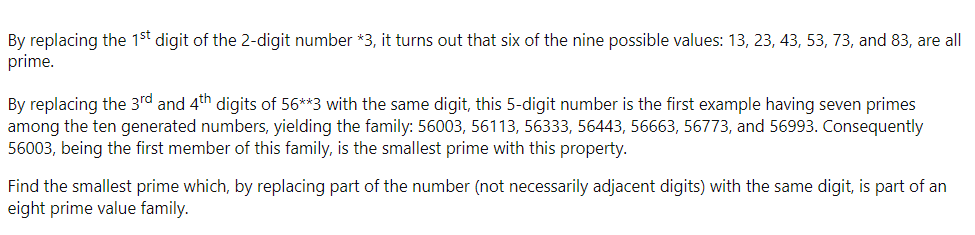

<br>
$**Hint**$

Follow below instructions:
1.  Define a function that gives all primes between two numbers given to it. Remember using hash table (python set) is more time-efficient than python lists.
2. Pick a digit from 0 to 9 (I recommend digit 1) and search in your generated primes set for numbers which have mmore one from that digit you picked.
3. Repeat previous step for other digits and count the primes.
4. If the counted primes are equal to 8 break the code and you're done.
5. If not, expand the length of your primes set.

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time

## Main Solution <a name="Main-Solution"></a>
First we difine our function to generate primes between two given numbers.

In [ ]:
def primes_between(m,n):
    sieve = [True] * (n+1)
    sieve [0] = sieve[1] = False

    p = 2
    while p**2 < n:
        for i in range(p*2, n + 1, p):
            sieve[i] = False
        p += 1

    a = {i for i in range(len(sieve)) if sieve[i]}
    b = {i for i in range(m) if sieve[i]}

    return a - b

Now we try to solve the problem

In [ ]:
start_time = time.time()

primes = primes_between(56993,10**6)

for n in primes:
    x = str(n).count('1')
    if x>0:
        #x position in n
        xp = [position for position , char in enumerate(str(n)) if char == "1"]
        count = 0   #count primes with digit replacements
        answers = []  #All primes generated with digit replacements

        for i in range(10):
            x_new = list(str(n)) #for checking other digits to be prime or not

            for p in xp:
                x_new[p] = str(i)

            if int(''.join(x_new)) in primes:
                count += 1
                answers.append(int(''.join(x_new)))

        if count == 8:
            #print(answers)  #if you want all answers umcomment this line
            answer = min(answers)
            break

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 121313 
Execution time: 0.9886 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

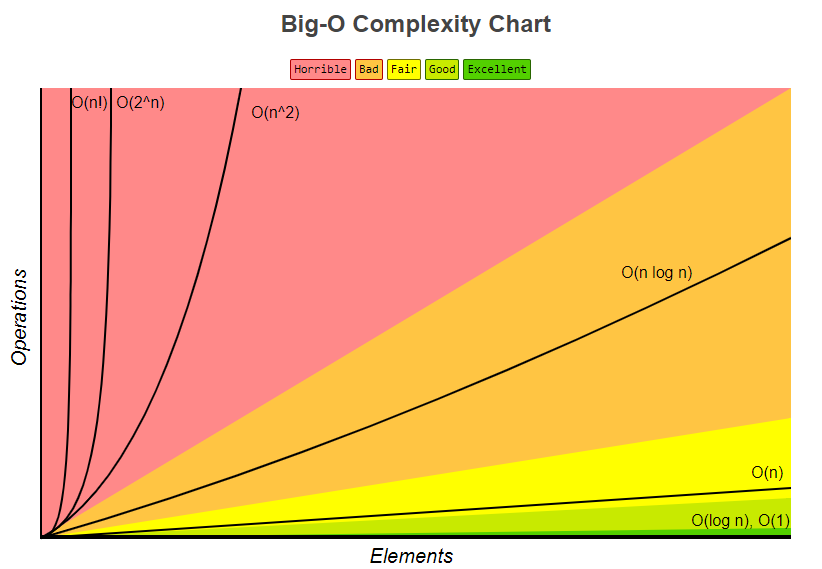

The **time complexity** of the `primes_between` function depends on the size of the range between `m` and `n`. It uses the Sieve of Eratosthenes algorithm to generate a list of prime numbers up to `n`. The main loop iterates until `p**2` is less than `n`, and within each iteration, it marks multiples of `p` as composite numbers. This process eliminates non-prime numbers from the sieve. Therefore, the time complexity of the `primes_between` function is approximately $O(n * log(log(n)))$.

In the subsequent loop that iterates over the prime numbers, the time complexity depends on the number of prime numbers within the given range. Let's assume there are `k` prime numbers between `m` and `n`. For each prime number, the code counts the occurrences of the digit '1' in `n`, finds the positions of '1' in the number, and then checks all possible digit replacements from 0 to 9. For each replacement, it checks if the resulting number is prime by looking it up in the `primes` set. Therefore, the **time complexity** of this loop is roughly $O(k * d)$, where `d` is the average number of positions where '1' occurs in a prime number.

The **space complexity** of the code mainly depends on the size of the `primes` set. The `primes_between` function generates a sieve of size `n+1`, which requires $O(n)$ space. The `primes` set stores the prime numbers between `m` and `n`, which can be up to $O(k)$ space. Other variables, such as `x_new`, `xp`, `answers`, and `answer`, require $O(1)$ space or space proportional to the input. Therefore, the overall **space complexity** is approximately $O(n + k)$.